<a href="https://colab.research.google.com/github/BelfinJoy89/pytorch/blob/master/assgn2_BelfinJoy_AI0121_DL_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q torch==1.2.0 torchvision


     |████████████████████████████████| 748.9MB 17kB/s 


In [0]:
!pip install --upgrade torchvision

     |████████████████████████████████| 8.8MB 4.6MB/s 
  Found existing installation: torchvision 0.3.0
    Uninstalling torchvision-0.3.0:
      Successfully uninstalled torchvision-0.3.0


In [0]:
import torch
torch.__version__

'1.2.0'

In [0]:
!unzip -q '/content/AI_CV_assignment2.zip'

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  
  def __init__(self,num_classes = 20):
    super(Net, self).__init__()
    print("Inside __Init__")
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=64,kernel_size=3,stride=1)
    self.bn1   = nn.BatchNorm2d(64)
    
    self.conv2 = nn.Conv2d(64,64,kernel_size = 3, stride = 1)
    self.bn2   = nn.BatchNorm2d(64)
    
    self.conv3 = nn.Conv2d(64,128,kernel_size = 3, stride = 1)
    self.bn3   = nn.BatchNorm2d(128)
    
    self.conv4 = nn.Conv2d(128,128,kernel_size = 3, stride = 1)
    self.bn4   = nn.BatchNorm2d(128)
    
    self.fc1   = nn.Linear(128*6*6, out_features=20)
    self.bn5   = nn.BatchNorm1d(20)
    
  def forward(self,x):
    
    out = self.conv1(x)
    out = F.relu(self.bn1(out))
    out = F.max_pool2d(out, 2)
    
    out = self.conv2(out)
    out = F.relu(self.bn2(out))
    out = F.max_pool2d(out, 2)
    
    out = self.conv3(out)
    out = F.relu(self.bn3(out))
    out = F.max_pool2d(out,2)
    
    out = self.conv4(out)
    out = F.relu(self.bn4(out))
    out = F.max_pool2d(out,2)
    
    #print("Out Shape", out.shape)
    out = out.view(out.size(0),-1)
    #print("Out shape after flatten", out.shape)
    
    out = self.fc1(out)
    out = F.relu(self.bn5(out))
    return out
  

def net(**kwargs):
  model = Net(**kwargs)
  return model

In [0]:
model = net(num_classes = 20)
print(model)

Inside __Init__
Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=4608, out_features=20, bias=True)
  (bn5): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [0]:
from torchvision import datasets, transforms
import torch
import numpy as np


train_root = "/content/AI_CV/Train"


dataset_train = datasets.ImageFolder(root = train_root,
                                          transform=transforms.Compose([
                                          transforms.Resize(128),
                                          transforms.ToTensor(),
                                          transforms.Normalize([0.2545,0.2545,0.2545],[0.3846,0.3846,0.3846])
                                          ]))

print(len(dataset_train))

test_root = "/content/AI_CV/Test"
dataset_test = datasets.ImageFolder(root = test_root,
                                          transform=transforms.Compose([
                                          transforms.Resize(128),
                                          transforms.ToTensor(),
                                          transforms.Normalize([0.2545,0.2545,0.2545],[0.3846,0.3846,0.3846])
                                          ]))
print(len(dataset_test))

dataloaders = torch.utils.data.DataLoader(
            dataset_train,
            batch_size=25, shuffle=True, num_workers=1)

dataloaders_test = torch.utils.data.DataLoader(
            dataset_test,
            batch_size=25, shuffle=True, num_workers=1)


#print(len(dataloaders))
for i, data in enumerate(dataloaders):
        inputs,labels = data
        print(np.array(inputs).shape)

print("Loaded {} images under {}".format(len(dataset_train), "train"))
print("Loaded {} images under {}".format(len(dataset_test), "test"))
print("Classes: ")
class_names = dataset_train.classes
print(dataset_train.classes)
#print(len(dataset_train[0]))

1157
277
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(25, 3, 128, 128)
(7, 3, 128, 128)
Loaded 1157 images under train
Loaded 277 images under test
Classes: 
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


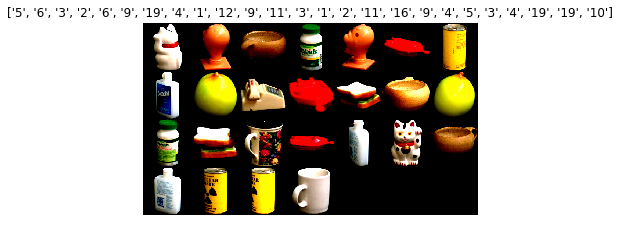

In [0]:
import torchvision
import matplotlib.pyplot as plt
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    # plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs,7)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(dataloaders))
show_databatch(inputs, classes)

#for i, data in enumerate(dataloaders))
#print(train[0])

In [0]:
import time
import copy


def train(model,criterion,optimizer,scheduler,num_epochs = 10):
  since = time.time()
  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  
  avg_loss = 0.0
  avg_acc = 0.0
  avg_loss_test = 0.0
  avg_acc_test = 0.0
  
  train_batches = len(dataloaders)
  test_batches = len(dataloaders_test)
  
  for epoch in range(num_epochs):
    print("Epoch {}/{}".format(epoch, num_epochs))
    print('-' * 10)
    
    loss_train = 0
    loss_test = 0
    acc_train = 0
    acc_test = 0
    
    model.train(True)
    
    for i,data in enumerate(dataloaders):
      inputs,labels = data
      
      if use_gpu:
        inputs,labels = Variable(inputs.cuda()), Variable(labels.cuda())
      else:
        inputs,labels = Variable(inputs), Variable(labels)
        
      optimizer.zero_grad()
      outputs = model(inputs)
      
      _,preds = torch.max(outputs.data, 1)
      loss = criterion(outputs,labels)
      
      loss.backward()
      optimizer.step()
      
      loss_train += loss.data
      acc_train += torch.sum(preds == labels.data)
      
      del inputs, labels,outputs, preds
      torch.cuda.empty_cache()
      
    print()
    
    avg_loss = loss_train / len(dataset_train)
    print(10*"*")
    avg_acc = float(acc_train.data) / float(len(dataset_train))
    
    model.train(False)
    
    model.eval()
    
    for i,data in enumerate(dataloaders_test):
      
      inputs, labels = data
      
      if use_gpu:
        inputs,labels = Variable(inputs.cuda(), volatile = True), Variable(labels.cuda(), volatile = True)
      else:
        inputs,labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)
        
      optimizer.zero_grad()
      outputs = model(inputs)
      
      _, preds = torch.max(outputs.data, 1)
      loss = criterion(outputs, labels)
      
      loss_test += loss.data
      acc_test += torch.sum(preds == labels.data)
            
      del inputs, labels, outputs, preds
      torch.cuda.empty_cache()
    
    avg_loss_test = (loss_test)/len(dataset_test)
    avg_acc_test = float(acc_test)/float(len(dataset_test))
    
    print()
    print("Epoch {} result: ".format(epoch))
    print("Avg loss (train): {:.4f}".format(avg_loss))
    print("Avg acc (train): {:.4f}".format(avg_acc))
    print("Avg loss (test): {:.4f}".format(avg_loss_test))
    print("Avg acc (test): {:.4f}".format(avg_acc_test))
    print('-' * 10)
    print()
    
    if avg_acc_test > best_acc:
      best_acc = avg_acc_test
      best_model_wts = copy.deepcopy(model.state_dict())

  elapsed_time =  time.time() - since
  print()
  print("Training completed in {:.0f}m {:.0f}s".format(elapsed_time // 60, elapsed_time % 60))
  print("Best acc: {:.4f}".format(best_acc))
  
  model.load_state_dict(best_model_wts)
  return model

In [0]:
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable

use_gpu = torch.cuda.is_available()

if use_gpu:
  model.cuda()

for param in model.parameters():
  param.requires_grad = True
  
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model.parameters(),lr = 0.001, momentum = 0.9)
lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size = 7, gamma = 0.1)

test = model.eval()

print("Training")
train(model,criterion, optimizer_ft, lr_scheduler, 10)

Training
Epoch 0/10
----------

**********


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.



Epoch 0 result: 
Avg loss (train): 0.0558
Avg acc (train): 0.7770
Avg loss (test): 0.0594
Avg acc (test): 0.7978
----------

Epoch 1/10
----------

**********

Epoch 1 result: 
Avg loss (train): 0.0329
Avg acc (train): 0.9326
Avg loss (test): 0.0344
Avg acc (test): 0.9134
----------

Epoch 2/10
----------

**********

Epoch 2 result: 
Avg loss (train): 0.0291
Avg acc (train): 0.9490
Avg loss (test): 0.0345
Avg acc (test): 0.8809
----------

Epoch 3/10
----------

**********

Epoch 3 result: 
Avg loss (train): 0.0277
Avg acc (train): 0.9464
Avg loss (test): 0.0375
Avg acc (test): 0.9134
----------

Epoch 4/10
----------

**********

Epoch 4 result: 
Avg loss (train): 0.0275
Avg acc (train): 0.9507
Avg loss (test): 0.0320
Avg acc (test): 0.9134
----------

Epoch 5/10
----------

**********

Epoch 5 result: 
Avg loss (train): 0.0243
Avg acc (train): 0.9542
Avg loss (test): 0.0321
Avg acc (test): 0.8953
----------

Epoch 6/10
----------

**********

Epoch 6 result: 
Avg loss (train): 0.02

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=4608, out_features=20, bias=True)
  (bn5): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [0]:
torch.save(model.state_dict(), 'assgn2_BelfinJoy_AI0121_DL_chkpt.pt')

In [0]:
from google.colab import files
files.download('assgn2_BelfinJoy_AI0121_DL_chkpt.pt')